# Dataset preprocessing

In this notebook we import the data sources and preprocess them in order to perform some sentiment analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First of all, let's set some Pandas options in order to (i) display dataframes columns at their full width and (ii) display float without scientific notation.

In [2]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

Now let's load the two main data sources: one contains the reviews and the other contains the recipes.

In [3]:
df_interactions = pd.read_csv('RAW_interactions.csv')
df_recipes = pd.read_csv('RAW_recipes.csv')

In [4]:
df_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [5]:
df_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-pat

Let's merge the two dataframes on their key tied to the recipe.

In [14]:
df_full = pd.merge(df_interactions,df_recipes,left_on='recipe_id',right_on='id').drop('id',axis=1)

In [15]:
df_full.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'soups-stews', 'beans', 'vegetables', 'easy', 'crock-pot-slow-cooker', 'dietary', 'equipment']","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teaspoon cumin , garlic powder and broth in crock pot', 'cook on low 8 hours or on high 4 hours', 'stir in cilantro , olive oil and remaining 1 / 2 teaspoon cumin', 'garnish with sour cream , if desired']",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'diced green chilies', 'ground cumin', 'garlic powder', 'fat-free chicken broth', 'fresh cilantro leaves', 'extra virgin olive oil', 'sour cream']",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'soups-stews', 'beans', 'vegetables', 'easy', 'crock-pot-slow-cooker', 'dietary', 'equipment']","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teaspoon cumin , garlic powder and broth in crock pot', 'cook on low 8 hours or on high 4 hours', 'stir in cilantro , olive oil and remaining 1 / 2 teaspoon cumin', 'garnish with sour cream , if desired']",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'diced green chilies', 'ground cumin', 'garlic powder', 'fat-free chicken broth', 'fresh cilantro leaves', 'extra virgin olive oil', 'sour cream']",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'for-large-groups', '5-ingredients-or-less', 'drop-cookies', 'desserts', 'lunch', 'oven', 'easy', 'potluck', 'fall', 'finger-food', 'heirloom-historical', 'holiday-event', 'kid-friendly', 'picnic', 'spring', 'summer', 'winter', 'cakes', 'cookies-and-brownies', 'easter', 'chocolate', 'dietary', 'gifts', 'christmas', 'hanukkah', 'new-years', 'seasonal', 'comfort-food', 'independence-day', 'ramadan', 'rosh-hashana', 'valentines-day', 'taste-mood', 'to-go', 'equipment', 'number-of-servings', 'presentation']","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'add chips of choice', 'drop by rounded tablespoon onto ungreased cookie sheet', 'bake at 350 for 9-12 minutes or until set', 'let cool 5 minutes before removing from cookie sheet']",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eggs', ""reese's pieces""]",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'condiments-etc', 'vegetables', 'easy', 'inexpensive', 'number-of-servings', '3-steps-or-less']","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,"['pick whichever topping you want to use and combine all ingredients', 'top baked potato with topping', 'could even throw under broiler for a few minutes if desired']","these toppings sure makes a nice change from plain old sour cream and bacon bits.you can use regular, light, fat free, or calorie reduced mayonnaise.","['mayonnaise', 'salsa', 'cheddar cheese', 'refried beans', 'ham', 'green pepper', 'tomatoes', 'cooked bacon', 'pepperoni'

From the descriptive stats we can make two observations:
- Most ratings are extremely positive, that is with <code>rating=5</code>.
- The maximum value of the <code>minutes</code> column is most probably wrong.

In order to better understand these features, let's visualise them.

In [17]:
df_full.describe()

,user_id,recipe_id,rating,minutes,contributor_id,n_steps,n_ingredients
count,1132367.00,1132367.00,1132367.00,1132367.00,1132367.00,1132367.00,1132367.00
mean,138429067.43,160897.21,4.41,36146.84,2655966.94,9.63,8.95
std,501426863.68,130398.72,1.26,8796493.79,67746702.41,5.82,3.69
min,1533.00,38.00,0.00,0.00,27.00,0.00,1.00
25%,135470.00,54257.00,4.00,20.00,37449.00,6.00,6.00
50%,330937.00,120547.00,5.00,40.00,89831.00,8.00,9.00
75%,804550.00,243852.00,5.00,70.00,242729.00,12.00,11.00
max,2002372706.00,537716.00,5.00,2147483647.00,2002289981.00,145.00,43.00


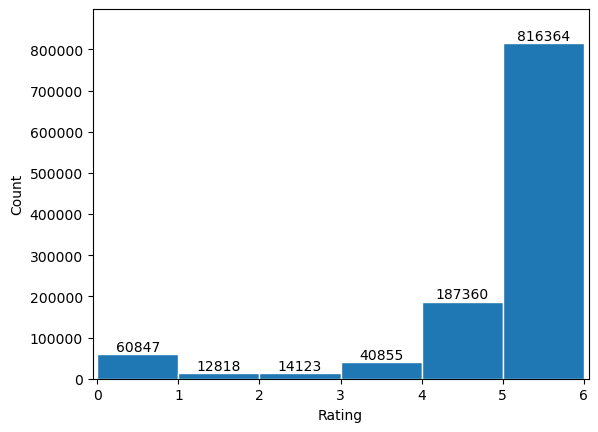

In [9]:
values, bins, bars = plt.hist(df_full['rating'],bins=np.arange(0,7,1),edgecolor='white')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.bar_label(bars, fontsize=10)
plt.margins(x=0.01, y=0.1)
plt.show()

Since the minutes distribution includes a very large range of values, it is better to plot its logarithm, taking care of shifting the zero values by some very small number.

Text(0, 0.5, 'Count')

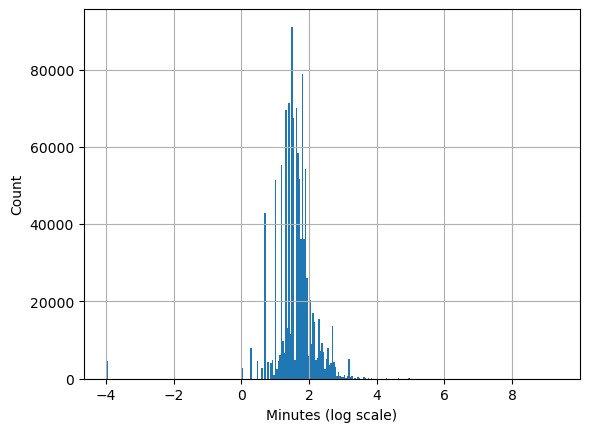

In [10]:
plot = df_full.minutes.apply(lambda x: np.log10(x+0.0001)).hist(bins=300)
plot.set_xlabel('Minutes (log scale)')
plot.set_ylabel('Count')

We clearly see that the vast majority of values for the <code>minutes</code> column is below $\sim 10^3$. Let's calculate some quantiles in order to find the best value to cut the distribution.

In [11]:
df_full.minutes.apply(lambda x: np.log10(x+0.0001)).quantile(np.linspace(0.9,1.0,10))

0.90   2.18
0.91   2.26
0.92   2.29
0.93   2.36
0.94   2.41
0.96   2.56
0.97   2.64
0.98   2.70
0.99   2.88
1.00   9.33
Name: minutes, dtype: float64

In [12]:
df_full = df_full.loc[df_full.minutes<=10**2.88]

In [13]:
df_full.describe()

,user_id,recipe_id,rating,minutes,contributor_id,n_steps,n_ingredients
count,1119854.00,1119854.00,1119854.00,1119854.00,1119854.00,1119854.00,1119854.00
mean,138419012.10,161126.41,4.41,66.78,2646489.63,9.59,8.95
std,501412771.88,130462.73,1.26,95.06,67576498.56,5.76,3.68
min,1533.00,39.00,0.00,0.00,27.00,0.00,1.00
25%,135470.00,54266.00,4.00,20.00,37449.00,6.00,6.00
50%,330904.00,120813.00,5.00,40.00,89831.00,8.00,9.00
75%,803511.00,244275.00,5.00,65.00,242729.00,12.00,11.00
max,2002372706.00,537716.00,5.00,755.00,2002289981.00,145.00,43.00


Before analysing the reviews, it is useful to drop the stopwords (like articles, prepositions, pronouns, conjunctions, etc), which do not add significant information to the text, and the punctuation. Moreover, we will drop also rows containing NaNs in the reviews.

In [8]:
df_full['review'].dropna(inplace=True)

In [9]:
stopwords = [
'i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
'her',
'hers',
'herself',
'it',
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'being',
'have',
'has',
'had',
'having',
'do',
'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'down',
'in',
'out',
'on',
'off',
'over',
'under',
'again',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'all',
'any',
'both',
'each',
'few',
'more',
'most',
'other',
'some',
'such',
'no',
'nor',
'not',
'only',
'own',
'same',
'so',
'than',
'too',
'very',
's',
't',
'can',
'will',
'just',
'don',
'should',
'now',
'&amp;',
'',
'...'
]

In [17]:
df_full['nostop_review'] = df_full.review.astype(str).apply(lambda row: ' '.join([word.lower() for word in row.split() if word.lower() not in stopwords]))

In [143]:
df_full['plain_review'] = df_full.review.astype(str).apply(lambda row: [word.lower().translate({ord(i): '' for i in '.,;:()[]!?'}) for word in row.split() if word.lower() not in stopwords])

As a last pre-processing step, we format the other text columns as lists of strings, and we convert the <code>date</code> column to the datetime format.

In [189]:
df_full['plain_tags'] = df_full.tags.apply(lambda row: row.translate({ord(i): '' for i in '[]\','}).split())

In [207]:
df_full['plain_name'] = df_full.name.astype(str).apply(lambda row: [word.lower().translate({ord(i): '' for i in '.,;:()[]!?'}) for word in row.split() if word.lower() not in stopwords])

In [209]:
df_full['plain_description'] = df_full.description.astype(str).apply(lambda row: [word.lower().translate({ord(i): '' for i in '.,;:()[]!?'}) for word in row.split() if word.lower() not in stopwords])

In [210]:
df_full['plain_ingredients'] = df_full.ingredients.apply(lambda row: row.translate({ord(i): '' for i in '[]\','}).split())

In [212]:
df_full.drop(['name','tags','steps','description','ingredients'],axis=1,inplace=True)

In [215]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_full['submitted'] = pd.to_datetime(df_full['submitted'])

We can now save the pre-processed dataset to disk.

In [217]:
df_full.to_pickle('preprocessed_dataset.pkl')